# 人脸区域及关键点检测

这案例展示了通过dlib进行人脸和人脸关键点（68）点的检测

- 对图片中的人脸进行区域和对关键点的检测
- 对视频中的人脸进行区域和对关键点的检测

### 进入ModelArts

点击如下链接：https://www.huaweicloud.com/product/modelarts.html ， 进入ModelArts主页。点击“立即使用”按钮，输入用户名和密码登录，进入ModelArts使用页面。

### 创建ModelArts notebook

下面，我们在ModelArts中创建一个notebook开发环境，ModelArts notebook提供网页版的Python开发环境，可以方便的编写、运行代码，并查看运行结果。

第一步：在ModelArts服务主界面依次点击“开发环境”、“创建”

![create_nb_create_button](./img/create_nb_create_button.png)

第二步：填写notebook所需的参数：

|项目|建议填写方式|
|-|-|
|名称|自定义环境名称|
|工作环境 | Python3|
| 资源池 | 选择"公共资源池"即可 |
|类型|GPU|
|规格|GPU:1*p100, CPU:8核64GiB|
|存储配置|EVS|
|磁盘规格|5GB|

第三步：配置好notebook参数后，点击下一步，进入notebook信息预览。确认无误后，点击“立即创建”

![create_nb_creation_summary](./img/create_nb_creation_summary.png)

第四步：创建完成后，返回开发环境主界面，等待Notebook创建完毕后，打开Notebook，进行下一步操作。
![modelarts_notebook_index](./img/modelarts_notebook_index.png)

### 在ModelArts中创建开发环境

接下来，我们创建一个实际的开发环境，用于后续的实验步骤。

第一步：点击下图所示的“打开”按钮，进入刚刚创建的Notebook
![inter_dev_env](img/enter_dev_env.png)

第二步：创建一个Python3环境的的Notebook。点击右上角的"New"，然后选择TensorFlow 1.13.1开发环境。

第三步：点击左上方的文件名"Untitled"，并输入一个与本实验相关的名称，如"face_detector"
![notebook_untitled_filename](./img/notebook_untitled_filename.png)
![notebook_name_the_ipynb](./img/notebook_name_the_ipynb.png)


### 在Notebook中编写并执行代码

在Notebook中，我们输入一个简单的打印语句，然后点击上方的运行按钮，可以查看语句执行的结果：
![run_helloworld](./img/run_helloworld.png)


开发环境准备好啦，接下来可以愉快地写代码啦！

### 数据和代码下载
运行下面代码，进行数据和代码的下载和解压


In [1]:
from modelarts.session import Session
sess = Session()

if sess.region_name == 'cn-north-1':
    bucket_path="modelarts-labs/notebook/DL_face_detector/detector.tar"
elif sess.region_name == 'cn-north-4':
    bucket_path="modelarts-labs-bj4/notebook/DL_face_detector/detector.tar"
else:
    print("请更换地区到北京一或北京四")

sess.download_data(bucket_path=bucket_path, path="./detector.tar")

Successfully download file modelarts-labs/notebook/DL_face_detector/detector.tar from OBS to local ./detector.tar


In [2]:
!tar -xf detector.tar

# 案例过程

安装`dlib`包

In [3]:
!pip install dlib==19.17.0

    100% |████████████████████████████████| 3.4MB 101.3MB/s ta 0:00:01K    47% |███████████████                 | 1.6MB 81.5MB/s eta 0:00:01
  Running setup.py bdist_wheel for dlib ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/08/5a/4b/bcf41d6cd899b5eb985f10fb94ef90439fa1c99369f3ec7db5
Successfully built dlib
You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## 对图片进行人脸检测

首先我们将测试文件打开，然后将检测模型加载进来：

In [4]:
from PIL import Image
import dlib

In [5]:
# 文件读取，可以换成其他图片进行测试
image = dlib.load_rgb_image("./face_1.jpeg")

In [6]:
detector = dlib.get_frontal_face_detector()

In [7]:
cnn_face_detector = dlib.cnn_face_detection_model_v1("./models/detector.dat")

In [8]:
dets = cnn_face_detector(image, 1)

获得检测结果：

In [9]:
dets

mmod_rectangles[[(443, 119) (613, 289)]]

In [10]:
print("Number of faces detected: {}".format(len(dets)))
for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(
        i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

Number of faces detected: 1
Detection 0: Left: 443 Top: 119 Right: 613 Bottom: 289 Confidence: 1.0296450853347778


In [11]:
rects = dlib.rectangles()
rects.extend([d.rect for d in dets])

In [12]:
rects

rectangles[[(443, 119) (613, 289)]]

In [13]:
import cv2
res_img = cv2.rectangle(image, (443, 119), (613, 289), 0, 1)

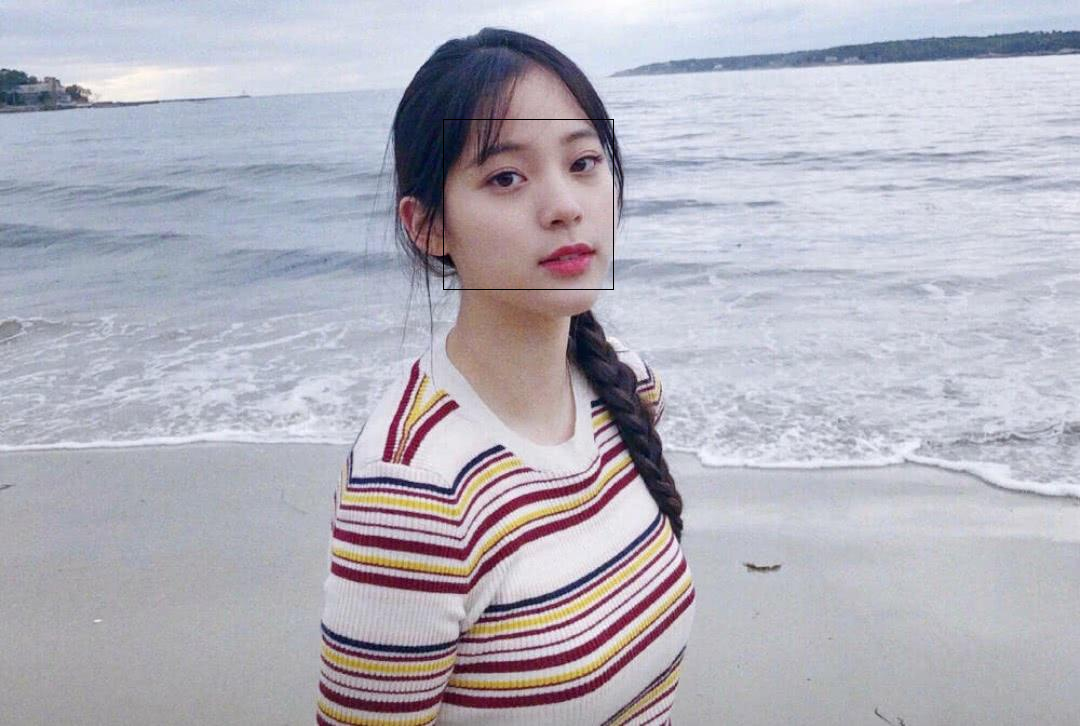

In [14]:
Image.fromarray(res_img)

下面是对人脸关键点的检测：

In [15]:
detector_kp = dlib.get_frontal_face_detector()

In [16]:
predictor_kp = dlib.shape_predictor("./models/shape_predictor_68_face_landmarks.dat")

In [17]:
dets = detector(image, 1)

In [18]:
for k, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    res_img = cv2.rectangle(res_img,( d.left(), d.top()), (d.right(), d.bottom()), 0, 1)
    shape = predictor_kp(image, d)
    print("Part 0: {}, Part 1: {} ...".format(shape.part(0),
                                              shape.part(1)))

Detection 0: Left: 448 Top: 118 Right: 634 Bottom: 304
Part 0: (435, 200), Part 1: (442, 224) ...


In [19]:
for i in range(68):
    res_img = cv2.circle(res_img,(shape.part(i).x,shape.part(i).y), 1, 255, 4)

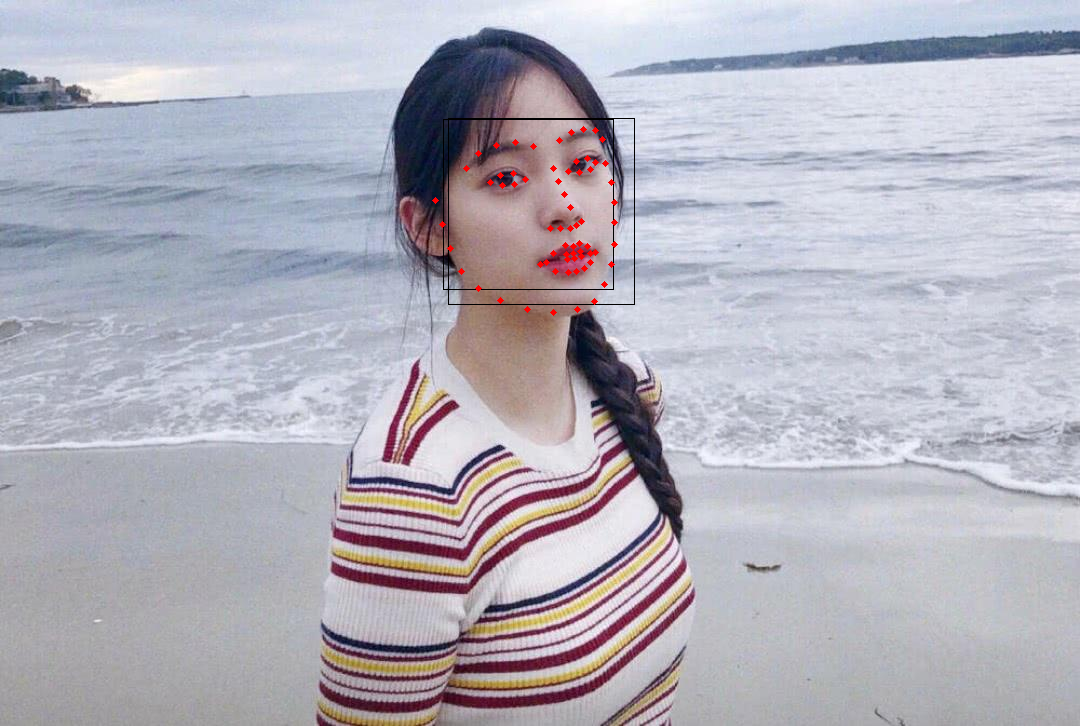

In [20]:
Image.fromarray(res_img)

对视频进行人脸检测

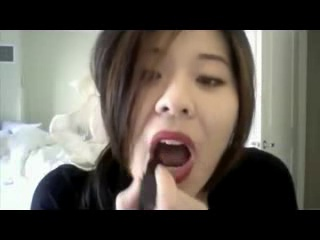

In [21]:
# 原视频，视频来源：UCF-101数据集
from IPython.display import clear_output, Image, display, HTML
import time
import cv2
import base64
import numpy as np

video_name = "./face_0.avi"

def arrayShow(img):
    _,ret = cv2.imencode('.jpg', img) 
    return Image(data=ret) 

cap = cv2.VideoCapture(video_name)

while True:
    try:
        clear_output(wait=True)
        ret, frame = cap.read()
        if ret:
            tmp = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img = arrayShow(frame)
            display(img)
            time.sleep(0.05)
        else:
            break
    except KeyboardInterrupt:
        cap.release()
cap.release()

In [22]:
# 原视频
from IPython.display import clear_output, Image, display, HTML
import time
import cv2
import base64
import numpy as np

video_name = "./face_0.avi"


In [23]:
def keypoint_detector(image):
    global res_img
    detector_kp = dlib.get_frontal_face_detector()
    predictor_kp = dlib.shape_predictor("./models/shape_predictor_68_face_landmarks.dat")
    dets = detector_kp(image, 1)
    for k, d in enumerate(dets):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        res_img = cv2.rectangle(image,( d.left(), d.top()), (d.right(), d.bottom()), 0, 1)
        shape = predictor_kp(image, d)
        for i in range(68):
            res_img = cv2.circle(image,(shape.part(i).x,shape.part(i).y), 1, 255, 2)
    return res_img

Detection 0: Left: 110 Top: 53 Right: 239 Bottom: 182


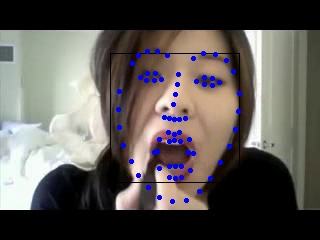

In [24]:
def arrayShow(img):
    _,ret = cv2.imencode('.jpg', img) 
    return Image(data=ret) 

cap = cv2.VideoCapture(video_name)

while True:
    try:
        clear_output(wait=True)
        ret, frame = cap.read()
        if ret:    
            res_img = keypoint_detector(frame)
            img = arrayShow(res_img)
            display(img)
            time.sleep(0.01)
        else:
            break
    except KeyboardInterrupt:
        cap.release()
cap.release()